In [9]:
import numpy as np
import pandas as pd

In [3]:
seq_df = pd.read_csv("data/society/All RNA sequence/human_RNA_sequence.txt", sep="\t")
rna_df = pd.read_csv("data/society/All RNA subcellular localization data.txt", sep="\t")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# seq to fasta
print(seq_df.head(1))
with open("data/society/human_RNA_sequence.fasta", 'w') as out:
    for i in range(len(seq_df)):
        out.write('>' + seq_df['Gene_ID'][i] + '|' + seq_df['Refseq_ID'][i] + '\n' + seq_df['Sequence'][i] + '\n')

     Gene_ID       Refseq_ID  \
0  NCBI:1305  NM_001368885.1   

                                            Sequence  
0  ATCCGATCCGTGCCGCCGCAGGGAGTGTGTCAAGTTACAGAGGCGC...  


In [21]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']

## Seq

### Col

['Gene_ID', 'Refseq_ID', 'Sequence']

## ALL RNA

### Col

['RNALocate_ID', 'Gene_ID', 'Gene_Name', 'Gene_symbol', 'RNA_category', 'Species', 'PMID', 'SubCellular_Localization', 'Description']

### 'RNA_category' in 'antisense RNA', 'lncRNA', 'lincRNA' and 'Species' == 'Homo sapiens'

`count()`
```txt
9210
```

`SubCellular_Localization unique()`
```txt
['Cytoplasm', 'Nucleus', 'Ribosome-free cytosol', 'Cytosol',
'Ribosome', 'Chromatin', 'Nucleoplasm', 'Nuclear',
'Nuclear periphery', 'Nucleolus', 'Paraspeckles in the nucleus',
'Endoplasmic reticulum', 'Periphery of the nucleus', 'Paraspeckle',
'Mitochondrion', 'Nuclear speckle', 'Microsome', 'Perinuclear',
'Nuclear membrane', 'Nuclear(exclusion from nucleoli)', 'Exosome',
'Soma', 'Speckle periphery', 'Insoluble cytoplasm', 'Membrane']
```

`SubCellular_Localization value_counts()`
```txt
Exosome                             6412
Nucleus                              865
Nucleoplasm                          437
Chromatin                            416
Nucleolus                            295
Cytosol                              289
Cytoplasm                            231
Membrane                             135
Insoluble cytoplasm                   47
Ribosome                              34
Ribosome-free cytosol                 16
Nuclear                                7
Mitochondrion                          5
Nuclear speckle                        5
Paraspeckle                            4
Paraspeckles in the nucleus            2
Endoplasmic reticulum                  2
Nuclear periphery                      1
Speckle periphery                      1
Soma                                   1
Microsome                              1
Nuclear(exclusion from nucleoli)       1
Nuclear membrane                       1
Perinuclear                            1
Periphery of the nucleus               1
Name: SubCellular_Localization, dtype: int64
```

`'Gene_ID', 'SubCellular_Localization' value_counts()value_counts()`
```
1     8728
2       76
3       15
4        8
5        6
21       1
11       1
10       1
9        1
7        1
dtype: int64
```

# problem

- All RNA subcellular localization data.txt / SubCellular_Localization 對應類別
```txt
Exosome                             6412    Cytosolic
Nucleus                              865    Nucleus
Nucleoplasm                          437    Nucleus
Chromatin                            416    Nucleus
Nucleolus                            295    Nucleus
Cytosol                              289    Cytosolic
Cytoplasm                            231    Cytosolic
Membrane                             135    Cytosolic
Insoluble cytoplasm                   47    Cytosolic
Ribosome                              34    Cytosolic
Ribosome-free cytosol                 16    Cytosolic
Nuclear                                7    Nucleus
Mitochondrion                          5    Cytosolic
Nuclear speckle                        5    Nucleus
Paraspeckle                            4    Nucleus
Paraspeckles in the nucleus            2    Nucleus
Endoplasmic reticulum                  2    Cytosolic
Nuclear periphery                      1    Nucleus
Speckle periphery                      1    Nucleus
Soma                                   1
Microsome                              1    Cytosolic
Nuclear(exclusion from nucleoli)       1    Nucleus
Nuclear membrane                       1    Nucleus
Perinuclear                            1    Nucleus
Periphery of the nucleus               1    Nucleus
Name: SubCellular_Localization, dtype: int64
```

照上面的規則取代後 count
```txt
Cytosolic    7172
Nucleus      2037
Soma            1
```

Gene_ID 的 SubCellular_Localization 數量
```txt
1    5675
2     881
3       1
```

- All RNA subcellular localization data.txt 與 human_RNA_sequence.txt 對應

In [5]:
# Cytosol,Cytoplasm,Ribosome,Exosome
# Nuclear,Nucleus
cytosolic = ['Exosome', 'Cytosol', 'Cytoplasm', 'Membrane', 'Insoluble cytoplasm', 'Ribosome', 'Ribosome-free cytosol', 'Mitochondrion', 'Endoplasmic reticulum', 'Microsome']
nucleus = ['Nucleus', 'Nucleoplasm', 'Chromatin', 'Nucleolus', 'Nuclear', 'Nuclear speckle', 'Paraspeckle', 'Paraspeckles in the nucleus', 'Nuclear periphery', 'Speckle periphery', 'Nuclear(exclusion from nucleoli)', 'Nuclear membrane', 'Perinuclear', 'Periphery of the nucleus']

sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
print(sub_df['SubCellular_Localization'].value_counts())


Cytosolic    7172
Nucleus      2037
Soma            1
Name: SubCellular_Localization, dtype: int64


In [58]:
print(sub_df.drop_duplicates(['Gene_ID', 'SubCellular_Localization'])['Gene_ID'].value_counts().value_counts())
# value_count = sub_df[['Gene_ID', 'SubCellular_Localization']].value_counts()
# print(value_count)
# print(value_count.value_counts())


1    5675
2     881
3       1
Name: Gene_ID, dtype: int64


In [6]:
print(sub_df.count())
print(sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'])].count())
sub_has_seq_df = sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'])]

RNALocate_ID                9210
Gene_ID                     9045
Gene_Name                   9210
Gene_symbol                 9062
RNA_category                9210
Species                     9210
PMID                         690
SubCellular_Localization    9210
Description                  690
dtype: int64
RNALocate_ID                5840
Gene_ID                     5840
Gene_Name                   5840
Gene_symbol                 5840
RNA_category                5840
Species                     5840
PMID                         443
SubCellular_Localization    5840
Description                  443
dtype: int64


In [2]:
import re
with open("data/society/human_RNA_sequence_sub_cdhit80.clstr") as f:
    arrays = f.read().split(">Cluster")
    cluster_array = []
    for cluster in arrays[1:]:
        cluster_dict = dict()
        cluster_dict["other"] = []
        for row in cluster.split("\n")[1:-1]:
            if "*" in row:
                cluster_dict["main"] = row[row.index("|")+1:row.index("...")]
            cluster_dict["other"].append(row[row.index(">")+1:row.index("|")])
        cluster_array.append(cluster_dict)

In [9]:
import csv

print(len(cluster_array))
with open("data/society/human_RNA_sequence_sub_cdhit80") as f:
    array = f.read().split(">")
    cdhit80_array = []
    for row in array:
        cdhit80_array.append(row.replace("\n", "|").split("|")[:-1])
    cdhit80_array = cdhit80_array[1:]
cdhit80_df = pd.DataFrame(cdhit80_array)
print(len(cdhit80_df))
print(cdhit80_df.head(10))


3980
3980
                0               1  \
0     NCBI:285758     NR_038863.2   
1  NCBI:100128640     NR_028389.1   
2  NCBI:101929484     NR_132623.1   
3  NCBI:101929484     NR_132622.1   
4  NCBI:100874363     NR_047504.1   
5     NCBI:643862  NM_001382504.1   
6       NCBI:2681     NR_168460.1   
7  NCBI:100505475     NR_120501.1   
8  NCBI:101929639     NR_108108.1   
9  NCBI:100630918     NR_038942.1   

                                                   2  
0  AGCTGCCGAGTGAGAAGTCTGACTATCCGGAGATGGCGGTGAGTAT...  
1  GCTACACTTAGTGACTCTGAGGGACATGCAACCCTCCCCGCATGCT...  
2  TCCGGGCGGAGAACAACAAGGTCTATTGGTCTATGTAATGCTGGTG...  
3  CCTGGCCGTGGGGTCAGCTGCACAGGCCAGGAGCTCGAGGGTGGTG...  
4  GGCTTTTTTTTCCTTGCCTTCTTTTCCCCCTCTCCCACCCCCTTCT...  
5  CTCCCGGGGCCCGAAGTTGTTTTCCGAGGCGCGGCGGCGAGGACAG...  
6  ACCCGCTGCGCTCTGCCCAGAGCAGAAGCCCGGCCGGCCGGCCCAC...  
7  AAAACCACACAGAGGAGAGCTAATCGGGGAGATAACTATTTGCTGT...  
8  GTTCGAAACCCCCTCCCTAACTCAGCCCGGCTGGACCCCGCTGCTT...  
9  TGTGGGAGAAAAAGCGACTGGGGCTTGCT

In [81]:
sub_seq_df = seq_df[seq_df['Gene_ID'].isin(sub_df['Gene_ID'])]
print(sub_seq_df.count())
sub_loc_df = sub_df[sub_df['Gene_ID'].isin(sub_seq_df['Gene_ID']) & (sub_df["SubCellular_Localization"].isin(["Cytosolic", "Nucleus"]))]
sub_loc_df = sub_loc_df[["Gene_ID", "SubCellular_Localization"]]
print(sub_loc_df.count())
merge_df = pd.merge(sub_seq_df, sub_loc_df, on=["Gene_ID"], how="inner")
print(merge_df.count())

for cluster_dict in cluster_array:
    merge_df.loc[merge_df["Refseq_ID"].isin(cluster_dict["other"]), ["Refseq_ID"]] = cluster_dict["main"]
# print(merge_df.head(5))
# print(len(merge_df["Refseq_ID"].unique()))

Gene_ID      5660
Refseq_ID    5660
Sequence     5660
dtype: int64
Gene_ID                     5839
SubCellular_Localization    5839
dtype: int64
Gene_ID                     11674
Refseq_ID                   11674
Sequence                    11674
SubCellular_Localization    11674
dtype: int64


In [83]:
print(len(merge_df["Refseq_ID"].unique()))
print(len(cdhit80_df))

3980
3980


In [156]:
col_array = ["Refseq_ID", "Cytosolic", "Nucleus"]
data = pd.DataFrame([], columns=col_array)
for cluster_dict in cluster_array:
    row = {"Refseq_ID": cluster_dict['main'],
            "Cytosolic": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Cytosolic")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])]),
            "Nucleus": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Nucleus")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])])}
    
    data = data.append(row, ignore_index=True)
print(data.head(5))

     Refseq_ID  Cytosolic   Nucleus
0  NR_002728.3   0.300000  0.700000
1  NR_003255.2   0.250000  0.750000
2  NM_173600.2   0.200000  0.800000
3  NR_170290.1   0.333333  0.666667
4  NR_131012.1   0.181818  0.818182


In [157]:
print(data.count())
print(len(data['Refseq_ID'].unique()))


Refseq_ID    3980
Cytosolic    3980
Nucleus      3980
dtype: int64
3980


In [ ]:
for rid in merge_df["Refseq_ID"].unique():
    for loc in merge_df["SubCellular_Localization"].unique():
        merge_df.loc[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc), ["W"]] = len(merge_df[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc)]) / len(merge_df[merge_df["Refseq_ID"] == rid])
print(merge_df.head(5))

          Gene_ID    Refseq_ID  \
0     NCBI:285758  NR_038863.2   
1  NCBI:100128640  NR_028389.1   
2  NCBI:101929484  NR_132623.1   
3  NCBI:101929484  NR_132622.1   
4  NCBI:100874363  NR_047504.1   

                                            Sequence SubCellular_Localization  \
0  AGCTGCCGAGTGAGAAGTCTGACTATCCGGAGATGGCGGTGAGTAT...                Cytosolic   
1  GCTACACTTAGTGACTCTGAGGGACATGCAACCCTCCCCGCATGCT...                Cytosolic   
2  TCCGGGCGGAGAACAACAAGGTCTATTGGTCTATGTAATGCTGGTG...                Cytosolic   
3  CCTGGCCGTGGGGTCAGCTGCACAGGCCAGGAGCTCGAGGGTGGTG...                Cytosolic   
4  GGCTTTTTTTTCCTTGCCTTCTTTTCCCCCTCTCCCACCCCCTTCT...                Cytosolic   

          W  
0  1.000000  
1  1.000000  
2  1.000000  
3  1.000000  
4  0.666667  


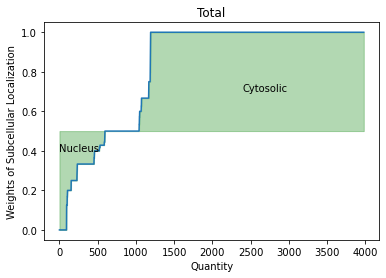

In [194]:
import matplotlib.pyplot as plt

w = data.sort_values(by=["Cytosolic"])["Cytosolic"]
w_idx = np.arange(len(w))

plt.plot(w_idx, w)
# plt.plot(w, w_idx)
plt.fill_between(w_idx, w, 0.5, color = 'g', alpha=0.3)
# plt.fill_between(w_idx, w, 0.5, color = 'r', alpha=0.3)
plt.text(len(w) * 0.6, .7, "Cytosolic")
plt.text(0, .4, "Nucleus")
plt.title("Total")
plt.xlabel("Quantity")
plt.ylabel("Weights of Subcellular Localization")
plt.show()

In [195]:
print(data["Cytosolic"].value_counts())
print(data["Nucleus"].value_counts())

# w = data[data["SubCellular_Localization"] == "Cytosolic"].sort_values(by=["W"])["W"]
# index = np.arange(len(w))
# plt.plot(index, w)
# plt.xlabel("Quantity")
# plt.ylabel("Weights of Subcellular Localization")
# plt.show()

1.000000    2790
0.500000     448
0.333333     219
0.666667      95
0.000000      93
0.250000      76
0.400000      65
0.428571      56
0.200000      48
0.600000      21
0.750000      18
0.416667       8
0.125000       8
0.444444       6
0.363636       4
0.625000       3
0.166667       3
0.533333       3
0.571429       3
0.800000       2
0.285714       2
0.714286       2
0.181818       1
0.888889       1
0.461538       1
0.307692       1
0.476190       1
0.375000       1
0.300000       1
Name: Cytosolic, dtype: int64
0.000000    2790
0.500000     448
0.666667     219
0.333333      95
1.000000      93
0.750000      76
0.600000      65
0.571429      56
0.800000      48
0.400000      21
0.250000      18
0.583333       8
0.875000       8
0.555556       6
0.636364       4
0.833333       3
0.466667       3
0.428571       3
0.375000       3
0.285714       2
0.200000       2
0.714286       2
0.523810       1
0.692308       1
0.625000       1
0.538462       1
0.700000       1
0.818182       1
0

In [152]:
print("ALL")
print(data["SubCellular_Localization"].value_counts())

for i in range(5, 10):
    print(i/10)
    print(data[data["W"] > i/10]["SubCellular_Localization"].value_counts())

ALL
Cytosolic    3887
Nucleus      1190
Name: SubCellular_Localization, dtype: int64
0.5
Cytosolic    2938
Nucleus       594
Name: SubCellular_Localization, dtype: int64
0.6
Cytosolic    2911
Nucleus       457
Name: SubCellular_Localization, dtype: int64
0.7
Cytosolic    2813
Nucleus       231
Name: SubCellular_Localization, dtype: int64
0.8
Cytosolic    2791
Nucleus       105
Name: SubCellular_Localization, dtype: int64
0.9
Cytosolic    2790
Nucleus        93
Name: SubCellular_Localization, dtype: int64


In [158]:
data.to_csv("data/society/cdhit80_data.csv", index=False)

In [13]:
data_df = pd.read_csv("data/society/cdhit80_data.csv")


# df = seq_sub_df["Refseq_ID"].value_counts().reset_index()

# print(seq_sub_df.drop_duplicates()["Sequence"].value_counts())

# print(seq_sub_df[seq_sub_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"][0:1])])
# print(len(seq_df[seq_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"])]))
# print(len(seq_df['Refseq_ID']))
# print(len(seq_df['Refseq_ID'].unique()))
cdhit_df = cdhit80_df.rename(columns={0:"Gene_ID", 1:"Refseq_ID", 2:"Sequence"})
print(len(cdhit_df))
merge_df = pd.merge(data_df, cdhit_df, on=["Refseq_ID"], how="inner")
print(merge_df.head(1))
print(len(merge_df))
# print(len(data_df['Refseq_ID']))
# print(len(data_df['Refseq_ID'].unique()))
merge_df.to_csv("data/society/cdhit80_data_seq.csv")


3980
     Refseq_ID  Cytosolic  Nucleus     Gene_ID  \
0  NR_002728.3        0.3      0.7  NCBI:10984   

                                            Sequence  
0  AGGCAGAACGGTCGCCGCGTCGCCTCAGCACGGACCTCCAGGGAGC...  
3980


In [10]:
df = pd.read_csv("data/linear_features/cdhit80_k3_linear10.csv")

In [11]:
len(df)

3980

In [7]:
cyt = df[df["Cytosolic"] >= 0.75]
cyt["loc"] = "Cytosolic"
nuc = df[df["Nucleus"] >= 0.75]
nuc["loc"] = "Nucleus"
print(len(cyt))
print(len(nuc))
output = cyt.append(nuc)
output = output.drop(columns=["Cytosolic", "Nucleus"])
print(len(output))
print(output.head(1))


2811
229
3040
              0             1             2             3             4  \
8 -2.031360e-42  2.215076e-37 -9.406858e-33  2.066686e-28 -2.563685e-24   

              5             6             7             8             9  ...  \
8  1.801307e-20 -6.676272e-17  1.176787e-13 -1.729383e-10 -3.832859e-07  ...   

            696           697           698           699           700  \
8  4.057175e-28 -4.371750e-24  2.780490e-20 -9.854962e-17  1.602832e-13   

            701           702       703    len        loc  
8 -3.686493e-11 -5.159456e-08  0.011145  16050  Cytosolic  

[1 rows x 706 columns]


<ipython-input-7-eebaa4a36bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyt["loc"] = "Cytosolic"
<ipython-input-7-eebaa4a36bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuc["loc"] = "Nucleus"


In [8]:
output.to_csv("data/linear_features/cdhit80_k3_linear10_loc75.csv", index=False)